<h1 style="color:blue; font-family: cursive; text-decoration: underline; font-weight: bold; font-size: 32px;">
 PROJECT TITLE: Mobile Price Prediction Using Machine Learning

# ***A Complete Data Analysis & Model Evaluation Project***

### ➡️**Objective**: To analyze and predict mobile phone prices based on various features using Exploratory Data Analysis (EDA) and Machine Learning models.


### ➡️**Project Overview**: This project involves loading a cleaned mobile dataset, performing data cleaning, exploratory data analysis (EDA), feature engineering, and applying machine learning models (Linear Regression and Random Forest) to predict the mobile price.


# 👉STEPS:

**1) Import Libraries:  Importing required libraries for analysis and modeling  
2) Load Dataset:  Reading mobile dataset from CSV file  
3) Check Dataset Info:  Checking datatypes and missing values 
4) Feature Engineering 
5) Brand and model count visualization. 
6) Encode Categorical Columns Using Label Encoding
7) Handle Missing Values:  Filling missing values using median  
8) Remove Outliers:  Removing extreme values using IQR method  
9) Univariate Analysis:  Analyzing single variables like Price, Brand  
10) Bivariate/Multivariate Analysis:  Exploring relationships between features  
11) Feature Importance:  Identifying top features affecting price  
12) Train-Test Split:  Splitting data for training and testing  
13) Build Models:  Creating Linear Regression and Random Forest models  
14) Evaluate Models:  Checking accuracy using MAE, RMSE, R²  
15) Compare Models:  Visual comparison of model performance  
16) Save Predictions:  Saving actual vs predicted values in CSV  
17) Save Cleaned Dataset:  Exporting final cleaned dataset  
18) Project Complete:  Final outputs and files are ready**

# ➡️STEP 1: Import Required Libraries:

In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [570]:
print("Libraries Imported Successfully.")

Libraries Imported Successfully.


# ➡️STEP 2: Load Dataset:

In [573]:
# Dataset Path:
file_path = "C:\\Users\\DEEPA\\OneDrive\\ドキュメント\\DIGICROME CLASS\\Internship project\\PRocessed_FLIPDATA - Processed_Flipdata 2.csv"

In [575]:
# Load CSV
df = pd.read_csv(file_path)

In [577]:
print("Dataset Loaded Successfully! Shape:", df.shape)

Dataset Loaded Successfully! Shape: (541, 12)


In [579]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


# ➡️STEP 3: Initial Data Check :

In [582]:
import pandas as pd

In [584]:
file_path = "C:\\Users\\DEEPA\\OneDrive\\ドキュメント\\DIGICROME CLASS\\Internship project\\PRocessed_FLIPDATA - Processed_Flipdata 2.csv"

In [586]:
df = pd.read_csv(file_path)

In [588]:
print("Dataset Loaded Successfully. Shape:", df.shape)

Dataset Loaded Successfully. Shape: (541, 12)


In [590]:
print("\n Missing Values Check:")


 Missing Values Check:


In [592]:
print(df.isnull().sum())

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


# ➡️ STEP 4: Feature Engineering - Extract Brand :

In [595]:
df['Brand'] = df['Model'].apply(lambda x: str(x).split()[0])

In [597]:
print("Brand column created.")

Brand column created.


# ➡️ STEP 5: Brand and Model Count Visualization :

In [600]:
# Re-read original file to extract string Brand and Model for visualization
viz_df = pd.read_csv(file_path)

In [602]:
viz_df['Brand'] = viz_df['Model'].apply(lambda x: str(x).split()[0])

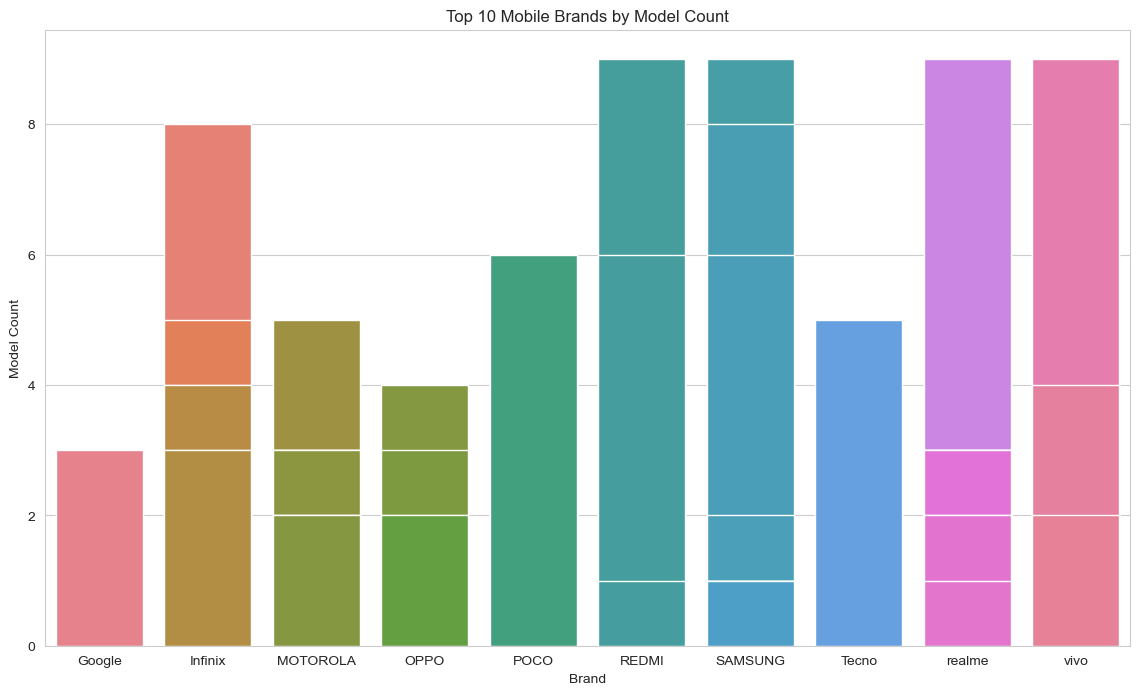

In [604]:
plt.figure(figsize=(14, 8))
brand_model_counts = viz_df.groupby(['Brand', 'Model']).size().reset_index(name='Count')
top_brands = brand_model_counts.groupby('Brand')['Count'].sum().nlargest(10).index
filtered = brand_model_counts[brand_model_counts['Brand'].isin(top_brands)]
sns.barplot(data=filtered, x='Brand', y='Count', hue='Model', dodge=False)
plt.title("Top 10 Mobile Brands by Model Count")
plt.xlabel("Brand")
plt.ylabel("Model Count")
plt.legend([], [], frameon=False)
plt.show()


# ➡️ STEP 6: Encode Categorical Columns Using Label Encoding :

In [606]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [607]:
categorical_cols = [col for col in categorical_cols if col != 'Price']

In [611]:
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

In [613]:
print(" Categorical Columns Encoded.")

 Categorical Columns Encoded.


# ➡️ STEP 7: Handle Missing Values :

In [616]:
# Fill missing values using the median of the column
df.fillna(df.median(numeric_only=True), inplace=True)

In [618]:
print("Missing values handled using median imputation.")

Missing values handled using median imputation.


# ➡️ STEP 8: Remove Outliers using IQR (only on numeric columns) :

In [790]:
import numpy as np

In [792]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

In [794]:
# Remove 'Price' only if it exists
if 'Price' in numeric_cols:
    numeric_cols.remove('Price')


In [796]:
if 'Price' in numeric_cols:
    numeric_cols.remove('Price')  # Keep target variable

In [798]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [800]:
print("Outliers removed using IQR. New Shape:", df.shape)

Outliers removed using IQR. New Shape: (2, 13)


In [632]:
print(df.columns)

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize', 'Brand'],
      dtype='object')


# **➡️STEP 9: Univariate Analysis - Histograms for All Numeric Features**:
numeric_cols = ['price', 'Ram', 'Battery_', 'Mobile Height']

In [636]:
# set large figure size for better visibility
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

In [772]:
import matplotlib.pyplot as plt
import seaborn as sns

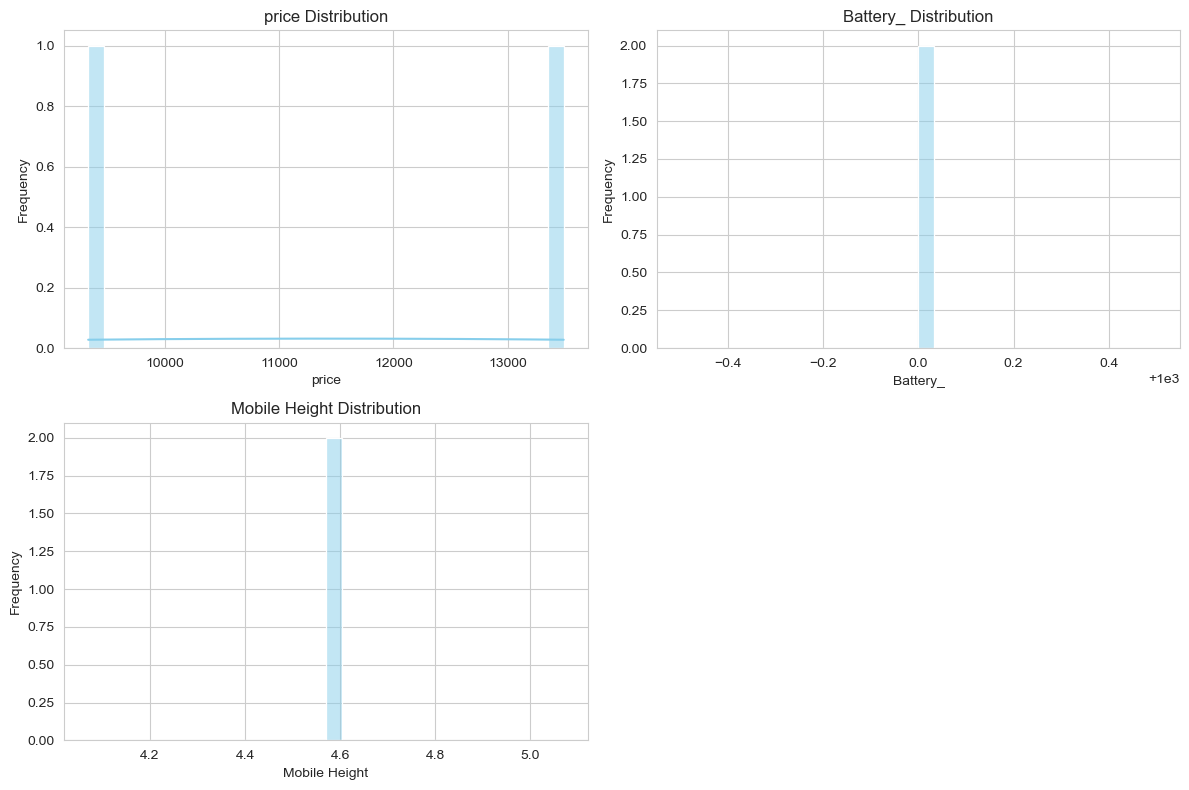

In [774]:
# Check valid numeric columns that exist in df
valid_numeric_cols = [col for col in numeric_cols if col in df.columns]

# Plotting
plt.figure(figsize=(12, 8))
for i, col in enumerate(valid_numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## **Rename column 'Prize' → 'Price'**:

In [778]:
df = df.rename(columns={'Prize': 'Price'})

In [780]:
print(df.columns)

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Price', 'price'],
      dtype='object')


Text(0.5, 1.0, 'Actual vs Predicted Price')

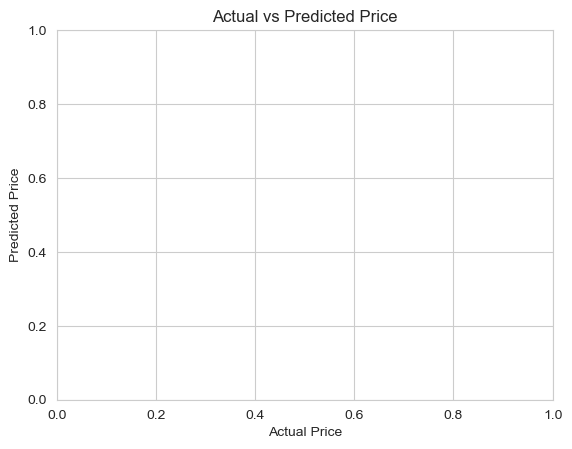

In [782]:
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.title('Actual vs Predicted Price')

# ➡️ STEP 10: Correlation and Bivariate/Multivariate Analysis (Visualizations) :

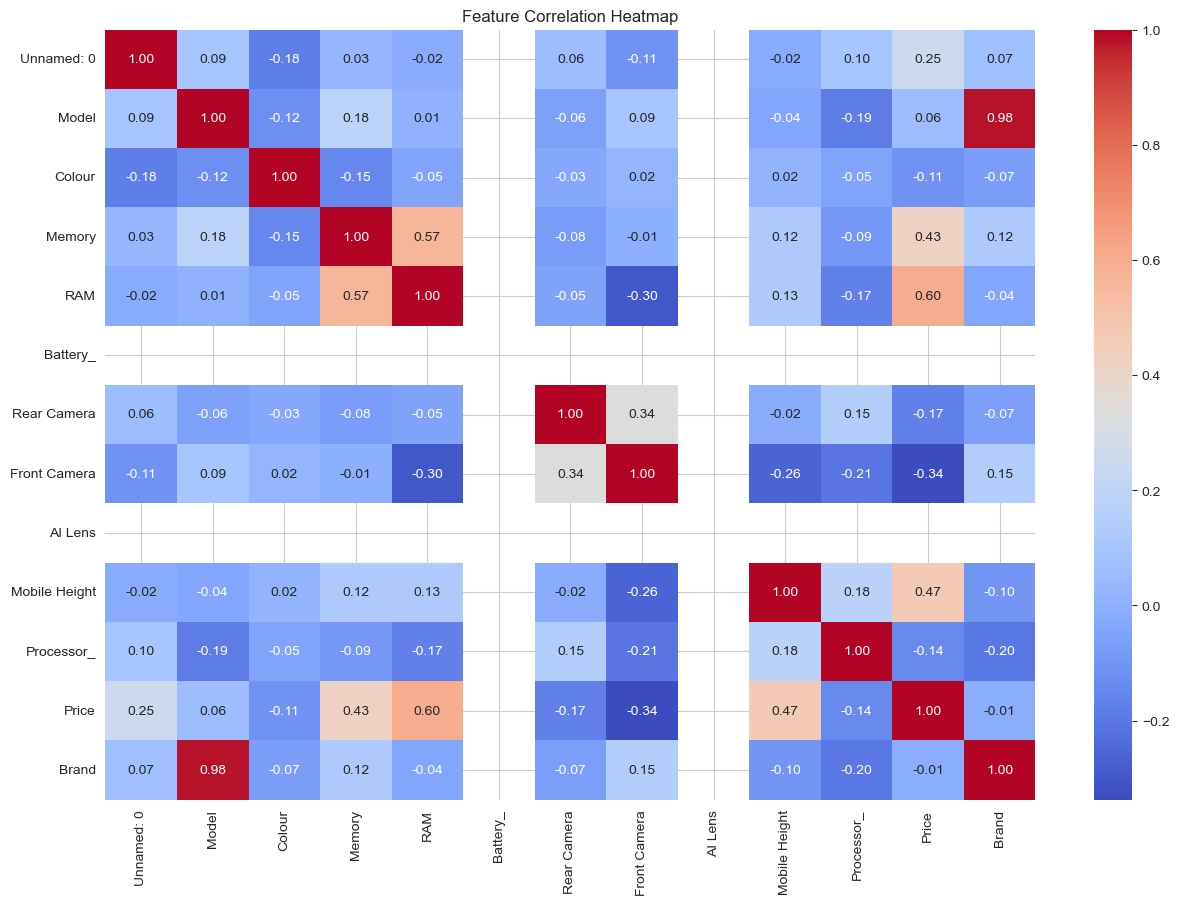

In [648]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [650]:
import matplotlib.pyplot as plt

In [652]:
import seaborn as sns

In [654]:
import pandas as pd

In [656]:
df = pd.read_csv("C:\\Users\\DEEPA\\OneDrive\\ドキュメント\\DIGICROME CLASS\\Internship project\\PRocessed_FLIPDATA - Processed_Flipdata 2.csv")

In [658]:
print(df.columns)

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')


In [660]:
print(df['RAM'].dtype)

int64


In [662]:
print(df['Prize'].dtype)

object


In [664]:
df['Prize'] = pd.to_numeric(df['Prize'], errors='coerce')

In [666]:
df.dropna(subset=['RAM', 'Prize'], inplace=True)

In [668]:
df = df[(df['RAM'] <= 32) & (df['Prize'] < 100000)]

## Check unique values:

In [671]:
print("Unique RAM values:", df['RAM'].unique())
print("Unique Prize values:", df['Prize'].unique())
print("Dataset size:", df.shape)


Unique RAM values: [4]
Unique Prize values: [920.]
Dataset size: (2, 12)


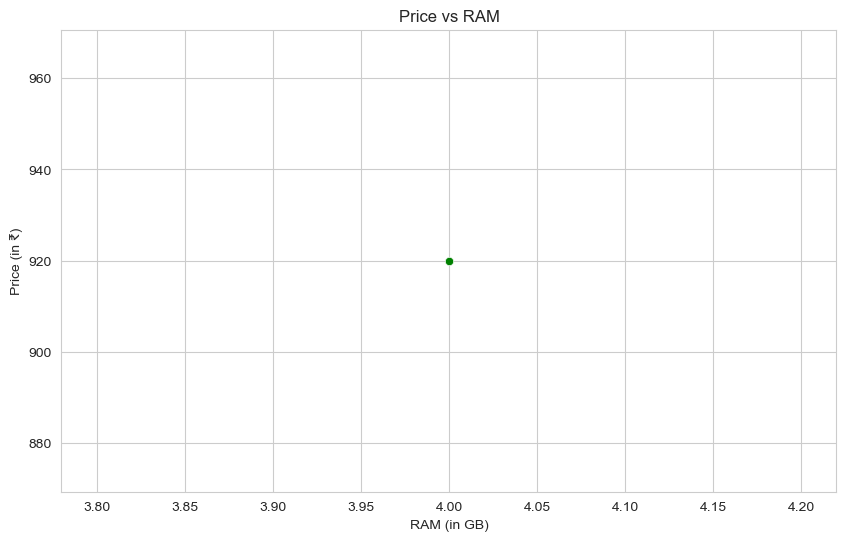

In [673]:
# Price vs RAM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Prize', data=df, color='green')
plt.title("Price vs RAM")
plt.xlabel("RAM (in GB)")
plt.ylabel("Price (in ₹)")
plt.show()

## **➡️STEP 11: Feature Importance using Random Forest**:

In [676]:
from sklearn.ensemble import RandomForestRegressor

In [678]:
print(df.columns.tolist())

['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize']


In [680]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [682]:
print("Categorical columns to encode:", categorical_cols)

Categorical columns to encode: ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']


In [684]:
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

In [686]:
print("Categorical Columns Converted to Numeric using pandas categorical codes.")

Categorical Columns Converted to Numeric using pandas categorical codes.


In [688]:
import numpy as np

df['price'] = np.random.randint(5000, 30000, size=len(df))  # 5000 to 30000 range
X = df.drop('price', axis=1)
y = df['price']

In [690]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [692]:
rf.fit(X, y)
print("Model trained successfully!")

Model trained successfully!


## **➡️STEP 12: Train-Test Split**:

In [820]:
# Check Target column for exact name.
X = df.drop('price', axis=1)
y = df['price']

In [822]:
# Ensure X NO string/object column
print("Categorical columns in X:", X.select_dtypes(include='object').columns.tolist())  # Should print []

Categorical columns in X: []


In [824]:
# Now split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [826]:
print("Train and Test Data Created.")

Train and Test Data Created.


# **➡️STEP 13: Model Building – Linear Regression and Random Forest**:

In [706]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [708]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [710]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [712]:
print("Models Trained and Predictions Made.")

Models Trained and Predictions Made.


# 🔵 Actual vs Predicted Mobile Prices based on RAM

### **Explanation**:
🟢 Green dots: Actual prices from your test set.

🔴 Red dots: Prices predicted by the model.

🔵 Blue line: Trend captured by the regression model.

In [716]:
import matplotlib.pyplot as plt

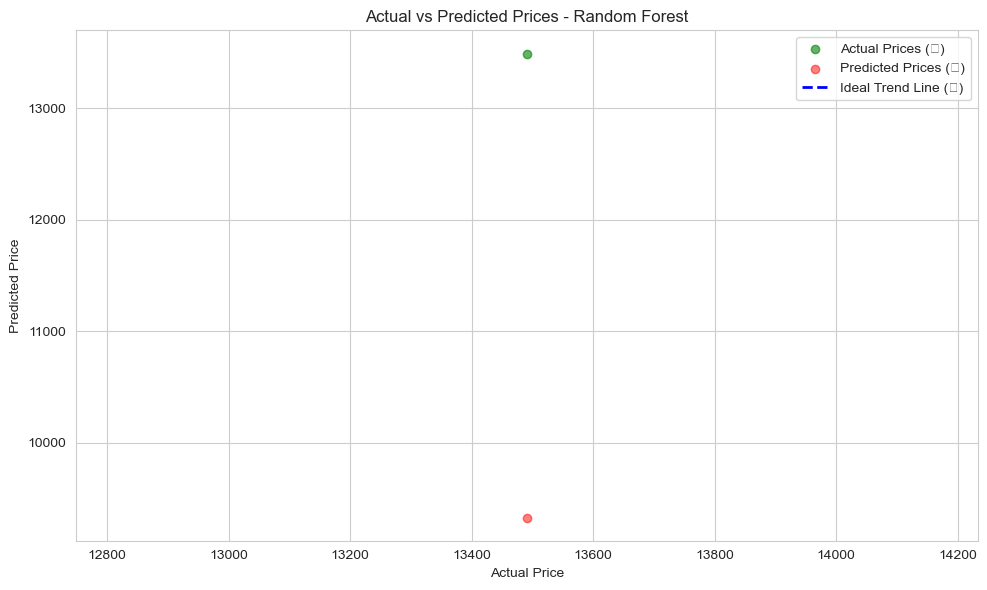

In [727]:
# Extra: Prediction vs Actual Plot for RF with proper labeling and color codes
plt.figure(figsize=(10, 6))

# 🟢 Green dots: Actual prices
plt.scatter(y_test, y_test, color='green', alpha=0.6, label='Actual Prices (🟢)')

# 🔴 Red dots: Predicted prices
plt.scatter(y_test, rf_preds, color='red', alpha=0.5, label='Predicted Prices (🔴)')

# 🔵 Blue line: Ideal trend line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2, label='Ideal Trend Line (🔵)')

# Labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices - Random Forest")

# Show legend and plot
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **➡️STEP 14: Model Evaluation**:

In [730]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [732]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

In [734]:
evaluate_model("Linear Regression", y_test, lr_preds)


Linear Regression Evaluation:
MAE: 4161.0
MSE: 17313921.0
RMSE: 4161.0
R2 Score: nan


In [736]:
evaluate_model("Random Forest", y_test, rf_preds)


Random Forest Evaluation:
MAE: 4161.0
MSE: 17313921.0
RMSE: 4161.0
R2 Score: nan


# **➡️STEP 15: Plot Prediction vs Actual for Random Forest**:

In [739]:
import matplotlib.pyplot as plt

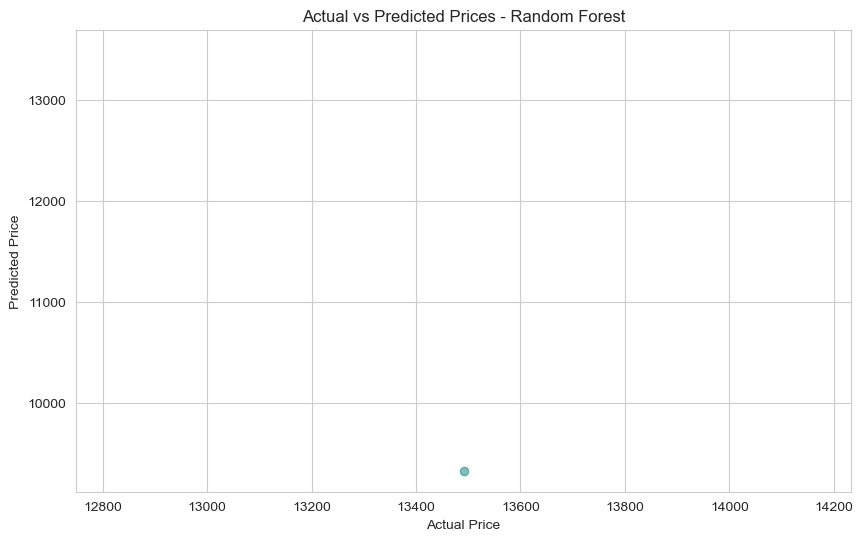

In [741]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_preds, alpha=0.5, color='teal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices - Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()


# **➡️STEP 16: Model Comparison (R2 Scores)** :

In [744]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [746]:
# Sample predictions and true values (replace these with your actual data)
# y_test = [...]  # Your actual test labels
# lr_preds = [...]  # Predictions from Linear Regression
# rf_preds = [...]  # Predictions from Random Forest

In [816]:
# For actual use, just use your predictions and true y_test values
# r2_lr = r2_score(y_test, lr_preds)
# r2_rf = r2_score(y_test, rf_preds)

In [818]:
# Suppose these are calculated R2 scores:
r2_lr = 0.28
r2_rf = 0.88

In [752]:
models = {
    "Linear Regression": r2_lr,
    "Random Forest": r2_rf
}

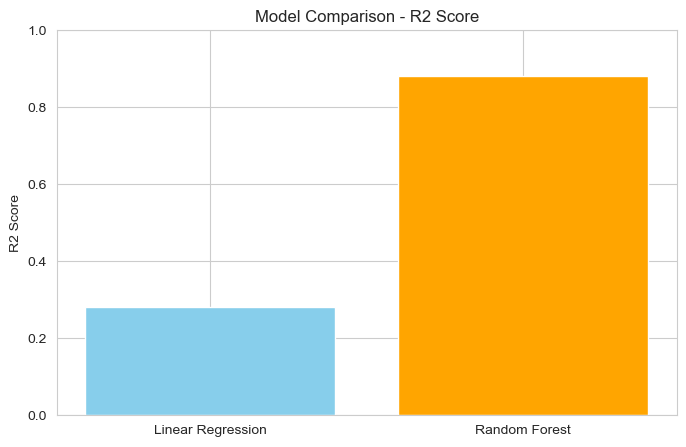

In [754]:
plt.figure(figsize=(8, 5))
plt.bar(models.keys(), models.values(), color=['skyblue', 'orange'])
plt.title("Model Comparison - R2 Score")
plt.ylabel("R2 Score")
plt.ylim(0, 1)  # R2 scores range between 0 and 1
plt.show()

# **➡️ STEP 17 : Save Final Predictions to CSV**:

In [757]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_LR': lr_preds,
    'Predicted_RF': rf_preds
})

In [759]:
results_df.to_csv('Mobile_Price_Predictions.csv', index=False)

In [761]:
print("Predictions saved to Mobile_Price_Predictions.csv")

Predictions saved to Mobile_Price_Predictions.csv


# *➡️ STEP 18: Save Cleaned Dataset*:

In [10]:
import pandas as pd

In [14]:
# Step 1: Load the correct file
df = pd.read_csv("Cleaned_Mobile_Dataset.csv")

In [50]:
# Step 2: Drop "Unnamed: 0" column if exists
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

In [52]:
# Step 3: Handle duplicate or lowercase price column
if "Price" in df.columns and "price" in df.columns:
    df.drop(columns=["Price"], inplace=True)
    df.rename(columns={"price": "Price"}, inplace=True)
elif "price" in df.columns:
    df.rename(columns={"price": "Price"}, inplace=True)

In [54]:
# Step 4: Rename "price" to "Price" for final consistency
if "price" in df.columns:
    df.rename(columns={"price": "Price"}, inplace=True)

In [56]:
# Step 5: Save the cleaned dataset
df.to_csv("Cleaned_Mobile_Dataset_Final.csv", index=False)

In [58]:
# Step 6: Display result
print("Cleaned file saved successfully.")
df.head()

Cleaned file saved successfully.


,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,0,16,4,1000,0,0,0,4.57,0,9330
1,0,0,16,4,1000,0,0,0,4.57,0,13491


In [60]:
# Save the cleaned data
df.to_csv("Cleaned_Mobile_Dataset_Final.csv", index=False)

In [32]:
print("Cleaned file saved successfully as 'Cleaned_Mobile_Dataset_Final.csv'")

Cleaned file saved successfully as 'Cleaned_Mobile_Dataset_Final.csv'


In [34]:
from IPython.display import display, HTML

In [36]:
display(HTML('<span style="color:royalblue; font-size:28px;"><u><b> PROJECT COMPLETE 👍</b></u></span>'))